# Model Loading and Predicting
by Prince Joseph Erneszer Javier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
X_test = pd.read_csv("data/processed/X_test_5000.csv")
y_test = pd.read_csv("data/processed/y_test_5000.csv")

mmsc = MinMaxScaler()
stdsc = StandardScaler()

cols = X_test.columns
# X_test = mmsc.fit_transform(X_test)
X_test = stdsc.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = cols)

In [3]:
X_test.head()

,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,-0.086212,-0.489477,-0.262121,0.713195,0.775330,-0.000966,-0.042752,0.025827,-0.265155,-0.585301
1,-0.086933,-0.608333,1.423405,0.703663,0.126565,1.055288,-0.271233,-0.471773,0.610070,1.784903
2,-0.085824,0.863656,-0.742246,0.767292,-0.041836,-0.763919,0.465515,0.288203,-0.584871,-0.087073
3,-0.086933,1.192796,0.267500,0.726650,-0.146967,-0.108505,-0.033630,-0.172879,0.098523,1.386826
4,-0.076482,1.448795,0.242457,0.568242,0.791910,0.315045,0.046819,0.318675,-0.824659,-1.085637


In [4]:
y_test.head()

,label
0,0
1,0
2,1
3,0
4,1


In [5]:
X_test.shape, y_test.shape

((2500, 10), (2500, 1))

In [6]:
# load the model from disk
filename = "models/gbm.sav"
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [7]:
result

0.5884

In [8]:
y_pred = loaded_model.predict(X_test)


Confusion Matrix Using Best Parameters


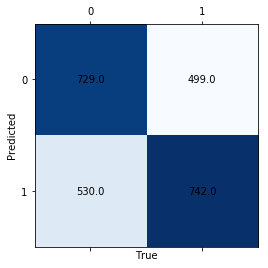

(array([0.        , 0.40635179, 1.        ]),
 array([0.        , 0.58333333, 1.        ]),
 array([2, 1, 0]))

In [9]:
# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# How to interpret this?
roc_curve(y_test, y_pred)